In [ ]:
# import sklearn
# from sklearn.model_selection import KFold
# import dgl
# from dgl.data import DGLDataset
# from dgl.dataloading import GraphDataLoader
# import torch
# from tqdm.auto import tqdm
# import pickle
# from dgl.data.utils import load_graphs

# class GraphDGL(DGLDataset):
#     def __init__(self, graphs, labels, node_attr_key):
#         super().__init__(name='GraphDGL')
#         self.graphs = graphs
#         self.labels = torch.LongTensor(labels)
#         self.node_attr_key = node_attr_key
#         # as all graphs have same length of node features then we get dim_nfeats from first graph in the list
#         self.dim_nfeats = graphs[0].ndata[node_attr_key].shape[1]
#         # to get the number of classes for graphs
#         self.gclasses = len(set(labels))

#     def __getitem__(self, i):
#         return self.graphs[i], self.labels[i]

#     def __len__(self):
#         return len(self.graphs)

# glist, label_dict = load_graphs('./graph/data/graph_dataset/graph_dataset.bin')
# orig_labels = label_dict['label'].tolist()
# trainingDataset = GraphDGL(glist, orig_labels, 'node_attr')
# kfold = KFold(n_splits=10, shuffle=True, random_state=42)
# for fold, (train_ids, test_ids) in enumerate(tqdm(kfold.split(trainingDataset), desc='folds', total=10)):
#     test_subsampler = torch.utils.data.SubsetRandomSampler(test_ids)
#     test_dataloader = GraphDataLoader(trainingDataset, sampler=test_subsampler, batch_size=100, drop_last=False)
#     model = torch.load('./graph/data/results/cl_5/ac_0.8263_ep_200_ba_100_lr_0.001_sz_19200/classifier.pt-fold_' + str(fold))
#     predicted = []
#     actual = []
#     for batched_graph, labels in tqdm(test_dataloader, desc='predicting', leave=False):
#         pred = model(batched_graph, batched_graph.ndata["node_attr"].float())
#         for tens in pred:
#             value = tens.argmax(0).item()
#             predicted.append(value)
#         actual.extend(labels.tolist())
#     with open('./graph/data/results/actual-' + str(fold) + '.pkl', 'wb') as act:
#         pickle.dump(actual, act)
#     with open('./graph/data/results/predicted-' + str(fold) + '.pkl', 'wb') as pred:
#         pickle.dump(predicted, pred)

In [ ]:
# with open('./graph/data/results/labels_train_set.pkl', 'wb') as lab:
#         pickle.dump(orig_labels, lab)

In [ ]:
# import zipfile
# import json
# import os
# import tempfile
# import pathlib

# with open('./graph/quantiles_dict.json', 'r') as qd:
#     quantiles_dict = json.load(qd)
    
# with open('./graph/conversion_list.json', 'r') as cl:
#     conversion_list = json.load(cl)

# for number in range(2500):
#     path = './graph/data/geometry/geometry_batch_' + str(number) + '.zip'
#     tmp = tempfile.TemporaryDirectory()
#     geometry_batch_path = os.path.join(tmp.name, str(number))
#     os.mkdir(geometry_batch_path)
#     with zipfile.ZipFile(path) as frame_zip:
#         for rotation in range(4):
#             rotation_path = os.path.join(geometry_batch_path, str(rotation))
#             os.mkdir(rotation_path)
#             for variant in range(4):
#                 json_file = frame_zip.open(os.path.join(str(rotation), (str(variant) + '.json')))
#                 data = json.load(json_file)
#                 for element in data[0]["cellDictionaries"]:
#                     function = element['dictionary']['ep_type'].lower()
#                     surface = element['dictionary']['area']
#                     quantile_list = quantiles_dict[function]
#                     if surface <= quantile_list[0]:
#                         size_string = 'xxs'
#                     elif surface <= quantile_list[1]:
#                         size_string = 'xs'
#                     elif surface <= quantile_list[2]:
#                         size_string = 's'
#                     elif surface <= quantile_list[3]:
#                         size_string = 'm'
#                     elif surface <= quantile_list[4]:
#                         size_string = 'l'
#                     elif surface <= quantile_list[5]:
#                         size_string = 'xl'
#                     elif surface > quantile_list[5]:
#                         size_string = 'xxl'
#                     label_string = function + '_' + size_string
#                     label = conversion_list.index(label_string)
                    
#                     element['dictionary']['label'] = label
                    
#                 for window_aperture in data[0]["faceApertures"]:
#                     if not window_aperture["brep"]:
#                         raise Exception("no brep")
                    
#                     surface = window_aperture["dictionary"]["area"]
#                     orientation_name = window_aperture["dictionary"]["orientation"]
#                     quantile_list = quantiles_dict['window']
#                     if surface <= quantile_list[0]:
#                         size_string = 'xxs'
#                     elif surface <= quantile_list[1]:
#                         size_string = 'xs'
#                     elif surface <= quantile_list[2]:
#                         size_string = 's'
#                     elif surface <= quantile_list[3]:
#                         size_string = 'm'
#                     elif surface <= quantile_list[4]:
#                         size_string = 'l'
#                     elif surface <= quantile_list[5]:
#                         size_string = 'xl'
#                     elif surface > quantile_list[5]:
#                         size_string = 'xxl'
#                     label_string = 'window_' + size_string + '_' + orientation_name
#                     label = conversion_list.index(label_string)

#                     window_aperture['dictionary']['label'] = label
                
#                 new_json_path = os.path.join(rotation_path, (str(variant) + '.json'))
#                 f = open(new_json_path, "w")
#                 json.dump(data, f, indent=4)
#                 f.close()
#     directory = pathlib.Path(geometry_batch_path)
#     zip_path_name = './graph/data/geometry_new/geometry_batch_' + str(number) + '.zip'
#     with zipfile.ZipFile(zip_path_name,'w', zipfile.ZIP_DEFLATED) as zip:
#             for file_path in directory.rglob("*"):
#                 zip.write(file_path, arcname=file_path.relative_to(directory))
#     tmp.cleanup()

In [60]:
frame_id = []
rotation_id = []
variant_id = []
room_amount = []
window_amount = []
total_surface = []
total_exterior_wall_amount = []
total_source_energy_consumption_GJ = []
total_site_energy_consumption_GJ = []
total_source_energy_consumption_per_surface_MJm2 = []
total_site_energy_consumption_per_surface_MJm2 = []
site_energy_heating_GJ = []
site_energy_cooling_GJ = []
site_energy_heating_per_surface_MJm2 = []
site_energy_cooling_per_surface_MJm2 = []
total_window_amount = []
total_wall_area_m2 = []
wall_area_north_m2 = []
wall_area_east_m2 = []
wall_area_south_m2 = []
wall_area_west_m2 = []
total_window_opening_area_m2 = []
window_opening_area_north_m2 = []
window_opening_area_east_m2 = []
window_opening_area_south_m2 = []
window_opening_area_west_m2 = []
total_window_wall_ratio_percent = []
window_wall_ratio_north_percent = []
window_wall_ratio_east_percent = []
window_wall_ratio_south_percent = []
window_wall_ratio_west_percent = []
labels_list = []
energy_class = []

livingroom_sizes = []
bedroom_sizes = []
toilet_sizes = []
bathroom_sizes = []
utility_sizes = []
window_sizes = []
energy_consomation = []

In [61]:
import zipfile
import json
import os
import pandas

def energy_to_class(energy_consumption, energy_quantiles):
    return next((i for i, q in enumerate(energy_quantiles) if energy_consumption <= q), len(energy_quantiles))

with open('./graph/quantiles_dict.json', 'r') as qd:
    quantiles_dict = json.load(qd)

for number in range(2500):
    path = './graph/data/geometry/geometry_batch_' + str(number) + '.zip'
    with zipfile.ZipFile(path) as frame_zip:
        for rotation in range(4):
            for variant in range(4):
                labels = []
                json_file = frame_zip.open(os.path.join(str(rotation), (str(variant) + '.json')))
                data = json.load(json_file)
                frame_id.append(number)
                rotation_id.append(rotation)
                variant_id.append(variant)
                room_amount.append(data[0]['dictionary']['room_amount'])
                window_amount.append(len(data[0]['faceApertures']))
                total_surface.append(data[0]['dictionary']['surface'])
                total_exterior_wall_amount.append(data[0]['dictionary']['total_exterior_wall_amount'])
                total_source_energy_consumption_GJ.append(data[0]['dictionary']['total_source_energy_consumption_GJ'])
                total_site_energy_consumption_GJ.append(data[0]['dictionary']['total_site_energy_consumption_GJ'])
                total_source_energy_consumption_per_surface_MJm2.append(data[0]['dictionary']['total_source_energy_consumption_per_surface_MJ/m2'])
                consumption = data[0]['dictionary']['total_site_energy_consumption_per_surface_MJ/m2']
                total_site_energy_consumption_per_surface_MJm2.append(consumption)
                site_energy_heating_GJ.append(data[0]['dictionary']['site_energy_heating_GJ'])
                site_energy_cooling_GJ.append(data[0]['dictionary']['site_energy_cooling_GJ'])
                site_energy_heating_per_surface_MJm2.append(data[0]['dictionary']['site_energy_heating_per_surface_MJ/m2'])
                site_energy_cooling_per_surface_MJm2.append(data[0]['dictionary']['site_energy_cooling_per_surface_MJ/m2'])
                total_window_amount.append(data[0]['dictionary']['total_window_amount'])
                total_wall_area_m2.append(data[0]['dictionary']['total_wall_area_m2'])
                wall_area_north_m2.append(data[0]['dictionary']['wall_area_north_m2'])
                wall_area_east_m2.append(data[0]['dictionary']['wall_area_east_m2'])
                wall_area_south_m2.append(data[0]['dictionary']['wall_area_south_m2'])
                wall_area_west_m2.append(data[0]['dictionary']['wall_area_west_m2'])
                total_window_opening_area_m2.append(data[0]['dictionary']['total_window_opening_area_m2'])
                window_opening_area_north_m2.append(data[0]['dictionary']['window_opening_area_north_m2'])
                window_opening_area_east_m2.append(data[0]['dictionary']['window_opening_area_east_m2'])
                window_opening_area_south_m2.append(data[0]['dictionary']['window_opening_area_south_m2'])
                window_opening_area_west_m2.append(data[0]['dictionary']['window_opening_area_west_m2'])
                total_window_wall_ratio_percent.append(data[0]['dictionary']['total_window-wall_ratio_%'])
                window_wall_ratio_north_percent.append(data[0]['dictionary']['window-wall_ratio_north_%'])
                window_wall_ratio_east_percent.append(data[0]['dictionary']['window-wall_ratio_east_%'])
                window_wall_ratio_south_percent.append(data[0]['dictionary']['window-wall_ratio_south_%'])
                window_wall_ratio_west_percent.append(data[0]['dictionary']['window-wall_ratio_west_%'])
                energy_consomation.append(data[0]['dictionary']['total_site_energy_consumption_per_surface_MJ/m2'])
                for element in data[0]["cellDictionaries"]:
                    labels.append(element['dictionary']['label'])
                    if element['dictionary']['ep_type'] == 'Livingroom':
                        livingroom_sizes.append(element['dictionary']['area'])
                    elif element['dictionary']['ep_type'] == 'Bedroom':
                        bedroom_sizes.append(element['dictionary']['area'])
                    elif element['dictionary']['ep_type'] == 'Toilet':
                        toilet_sizes.append(element['dictionary']['area'])
                    elif element['dictionary']['ep_type'] == 'Bathroom':
                        bathroom_sizes.append(element['dictionary']['area'])
                    elif element['dictionary']['ep_type'] == 'Utility':
                        utility_sizes.append(element['dictionary']['area'])
                for window_aperture in data[0]["faceApertures"]:
                    labels.append(window_aperture['dictionary']['label'])
                    window_sizes.append(window_aperture["dictionary"]["area"])
                labels_list.append(labels)
                energy_class.append(energy_to_class(consumption, quantiles_dict['energy']))

In [62]:
ep_data = {
    'labels': labels_list,
    'frame_id': frame_id,
    'rotation_id': rotation_id,
    'variant_id': variant_id,
    'room_amount': room_amount,
    'window_amount': window_amount,
    'surface': total_surface,
    'total_exterior_wall_amount': total_exterior_wall_amount,
    'total_source_energy_consumption_GJ': total_source_energy_consumption_GJ,
    'total_site_energy_consumption_GJ': total_site_energy_consumption_GJ,
    'total_source_energy_consumption_per_surface_MJm2': total_source_energy_consumption_per_surface_MJm2,
    'total_site_energy_consumption_per_surface_MJm2': total_site_energy_consumption_per_surface_MJm2,
    'energy_class': energy_class,
    'site_energy_heating_GJ': site_energy_heating_GJ,
    'site_energy_cooling_GJ': site_energy_cooling_GJ,
    'site_energy_heating_per_surface_MJm2': site_energy_heating_per_surface_MJm2,
    'site_energy_cooling_per_surface_MJm2': site_energy_cooling_per_surface_MJm2,
    'total_window_amount': total_window_amount,
    'total_wall_area_m2': total_wall_area_m2,
    'wall_area_north_m2': wall_area_north_m2,
    'wall_area_east_m2': wall_area_east_m2,
    'wall_area_south_m2': wall_area_south_m2,
    'wall_area_west_m2': wall_area_west_m2,
    'total_window_opening_area_m2': total_window_opening_area_m2,
    'window_opening_area_north_m2': window_opening_area_north_m2,
    'window_opening_area_east_m2': window_opening_area_east_m2,
    'window_opening_area_south_m2': window_opening_area_south_m2,
    'window_opening_area_west_m2': window_opening_area_west_m2,
    'total_window_wall_ratio_percent': total_window_wall_ratio_percent,
    'window_wall_ratio_north_percent': window_wall_ratio_north_percent,
    'window_wall_ratio_east_percent': window_wall_ratio_east_percent,
    'window_wall_ratio_south_percent': window_wall_ratio_south_percent,
    'window_wall_ratio_west_percent': window_wall_ratio_west_percent,  
}

data_summary = pandas.DataFrame(ep_data)

In [4]:
data_summary.to_csv('./graph/data/data_info/info.csv', index=False)

In [ ]:
# livingroom_summary = pandas.Series(livingroom_sizes)
# bedroom_summary = pandas.Series(bedroom_sizes)
# toilet_summary = pandas.Series(toilet_sizes)
# bathroom_summary = pandas.Series(bathroom_sizes)
# utility_summary = pandas.Series(utility_sizes)
# window_summary = pandas.Series(window_sizes)
# energy_summary = pandas.Series(energy_consomation)
# seven_quantiles = [1/7, 2/7, 3/7, 4/7, 5/7, 6/7]
# five_quantiles = [1/5, 2/5, 3/5, 4/5]
# window_quantiles = window_summary.quantile(seven_quantiles).tolist()
# livingroom_quantiles = livingroom_summary.quantile(seven_quantiles).tolist()
# bedroom_quantiles = bedroom_summary.quantile(seven_quantiles).tolist()
# toilet_quantiles = toilet_summary.quantile(seven_quantiles).tolist()
# bathroom_quantiles = bathroom_summary.quantile(seven_quantiles).tolist()
# utility_quantiles = utility_summary.quantile(seven_quantiles).tolist()
# energy_quantiles = energy_summary.quantile(five_quantiles).tolist()
# quantiles_dict = {
#     'window' : window_quantiles,
#     'livingroom' : livingroom_quantiles,
#     'bedroom' : bedroom_quantiles,
#     'toilet' : toilet_quantiles,
#     'bathroom' : bathroom_quantiles,
#     'utility' : utility_quantiles,
#     'energy' : energy_quantiles
# }

# with open('./graph/quantiles_dict_5.json', "w") as qd:
#      json.dump(quantiles_dict, qd)

In [105]:
import matplotlib.colors as colors
import matplotlib.cm as cm
import matplotlib.pyplot as plt

cmap_colors = ['#a0cec2', '#0d585f']
custom_cmap = colors.LinearSegmentedColormap.from_list('custom_cmap', cmap_colors)

cm.register_cmap(name='my_cmap1', cmap=custom_cmap)

/tmp/ipykernel_94307/1825967360.py:8: MatplotlibDeprecationWarning: The register_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps.register(name)`` instead.
  cm.register_cmap(name='my_cmap1', cmap=custom_cmap)


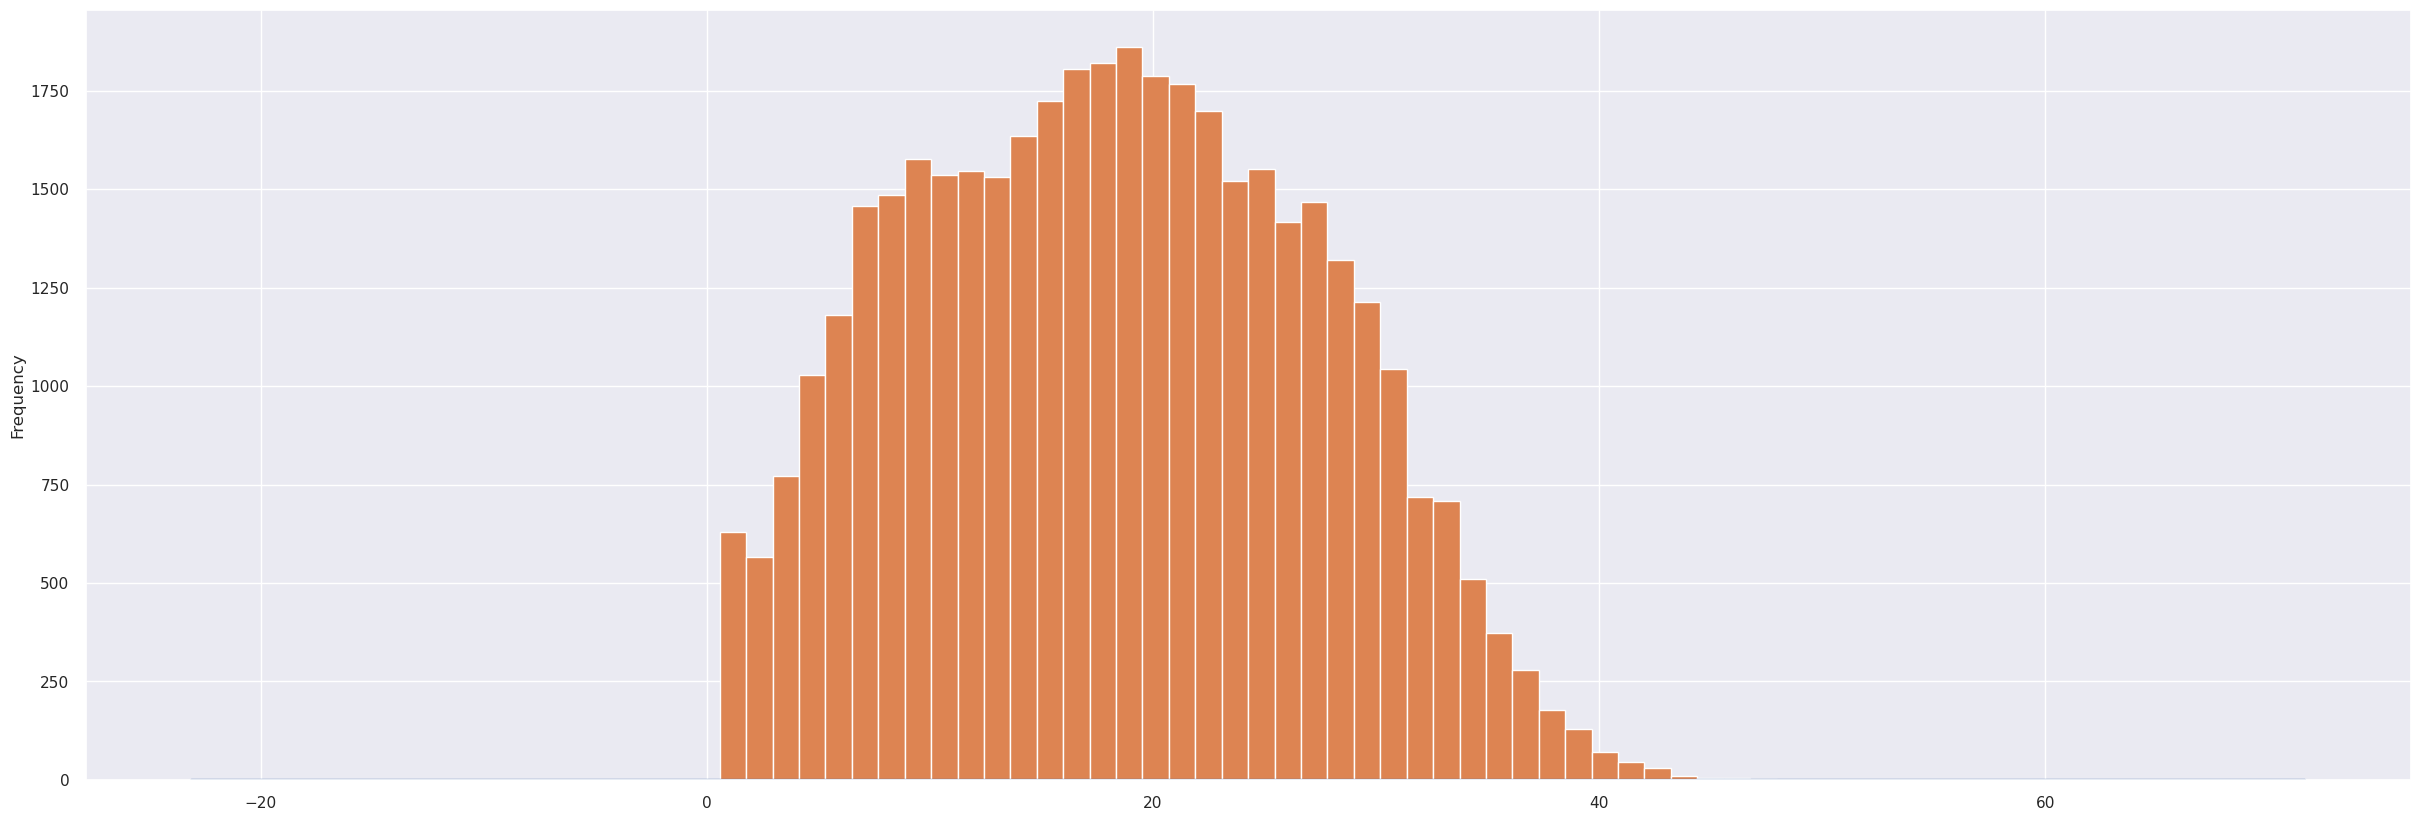

In [100]:
ax = data_summary['total_window_opening_area_m2'].plot(kind='kde')
data_summary['total_window_opening_area_m2'].plot(kind='hist', bins=40, ax=ax)
plt.savefig('./hst_total_window_opening_area_m2.svg', format='svg', dpi=300)

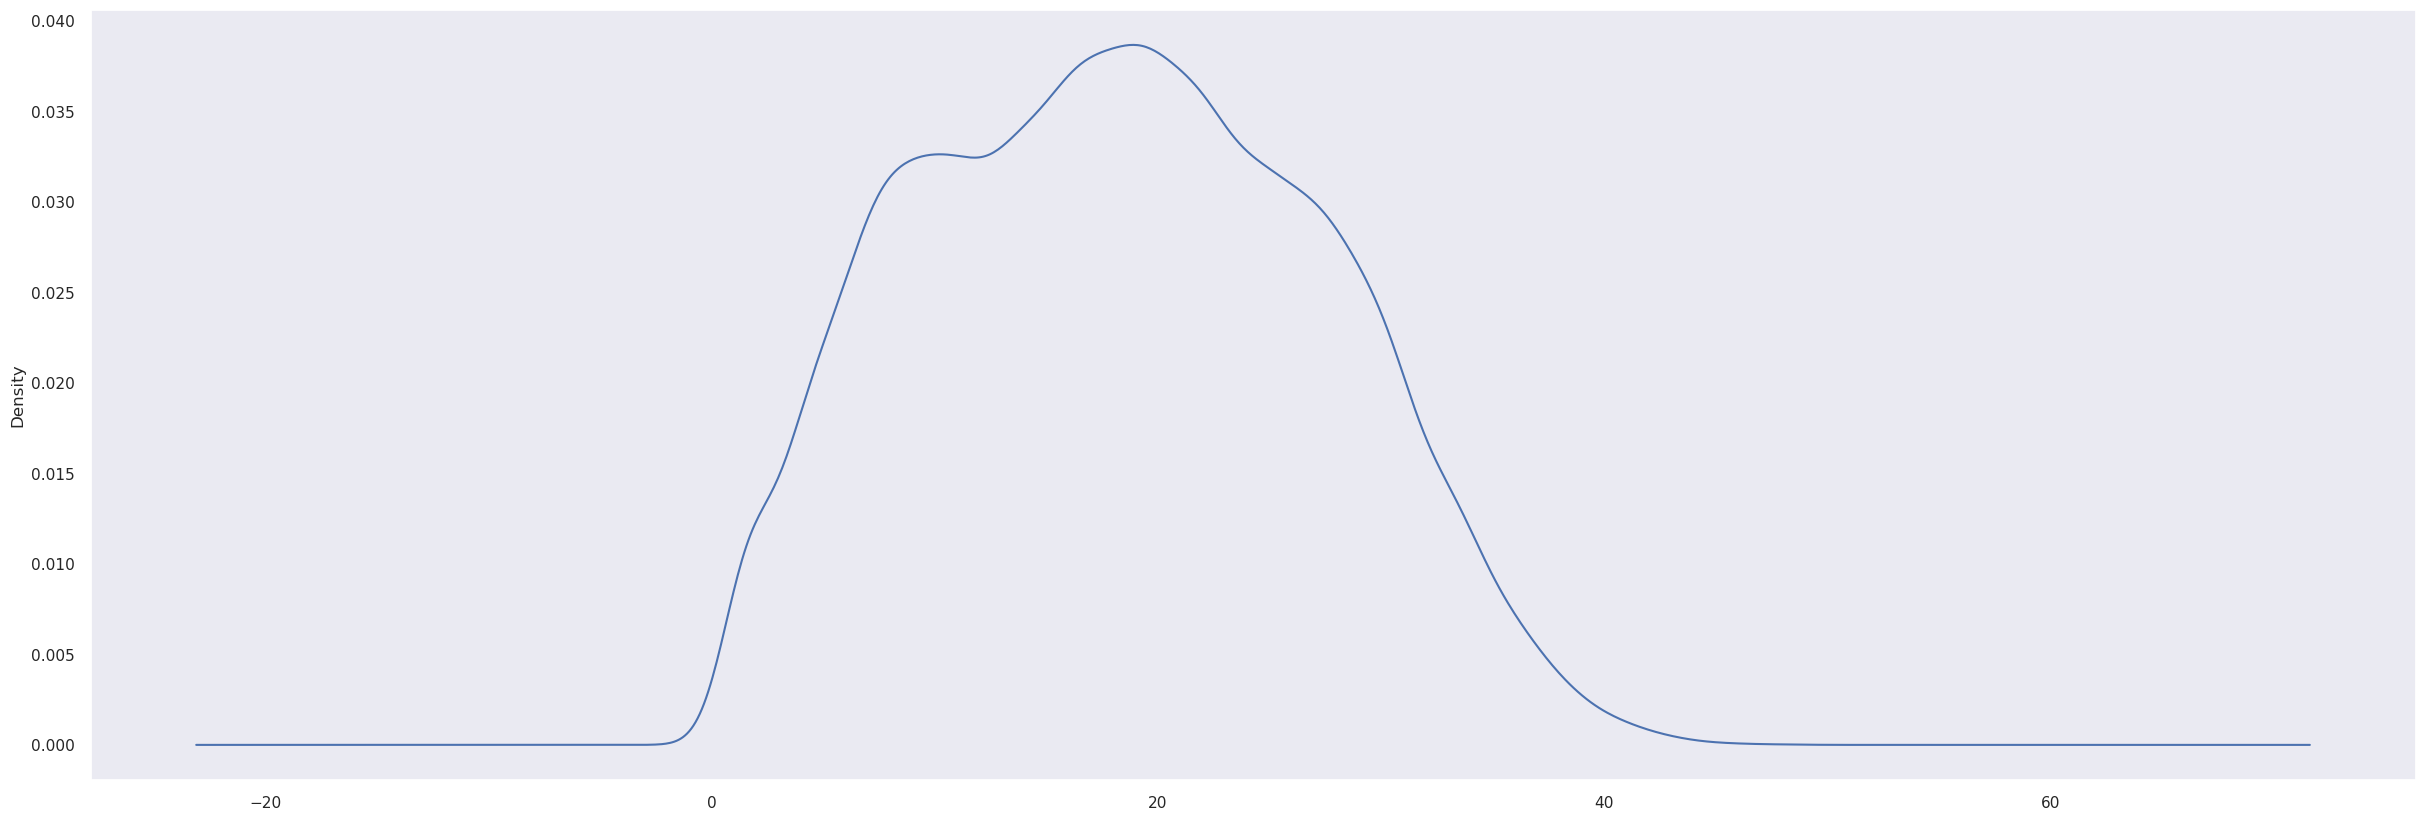

In [101]:
kde1 = data_summary['total_window_opening_area_m2'].plot(kind='kde', figsize=(30, 10), grid=False)
plt.savefig('./kde_total_window_opening_area_m2.svg', format='svg', dpi=300)

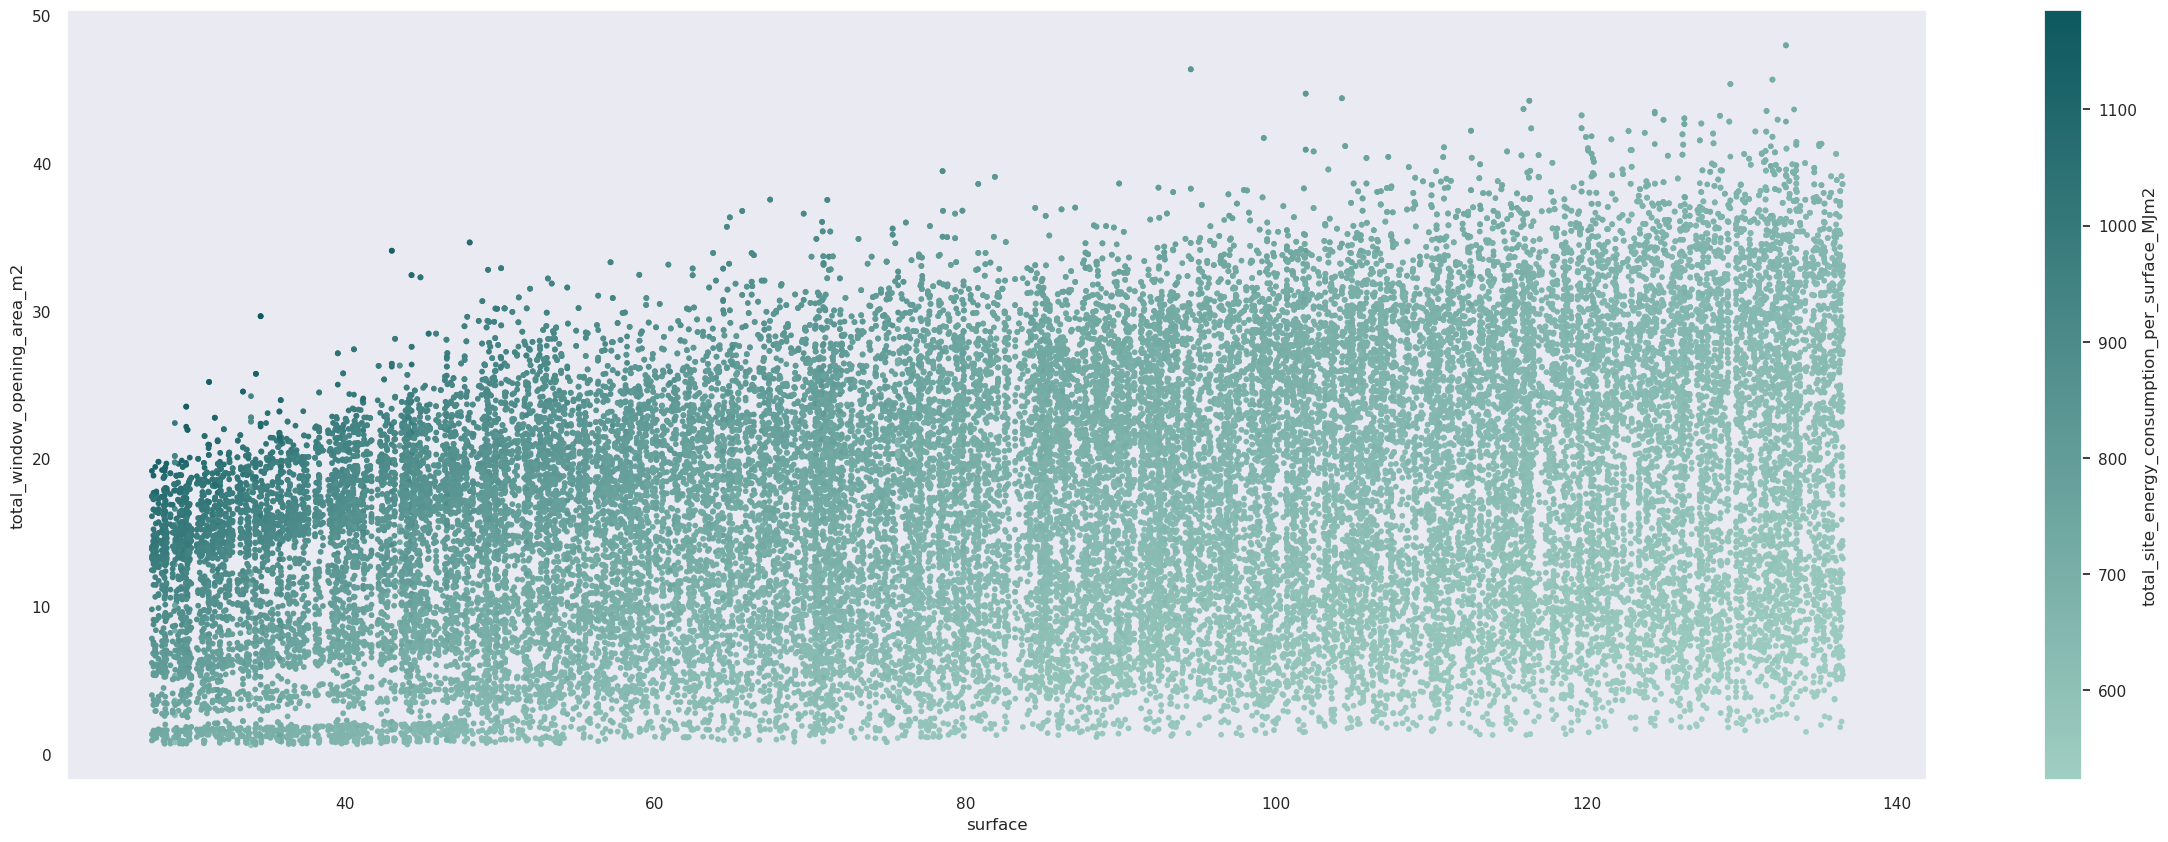

In [118]:
plot1 = data_summary.plot.scatter(
    x='surface',
    y='total_window_opening_area_m2',
    c='total_site_energy_consumption_per_surface_MJm2',
    s=10,
    colormap='my_cmap1',
    marker='o',
    figsize=(30, 10),
    grid=False,
    rasterized=True
)
plt.savefig('./plot0.svg', format='svg', dpi=100)

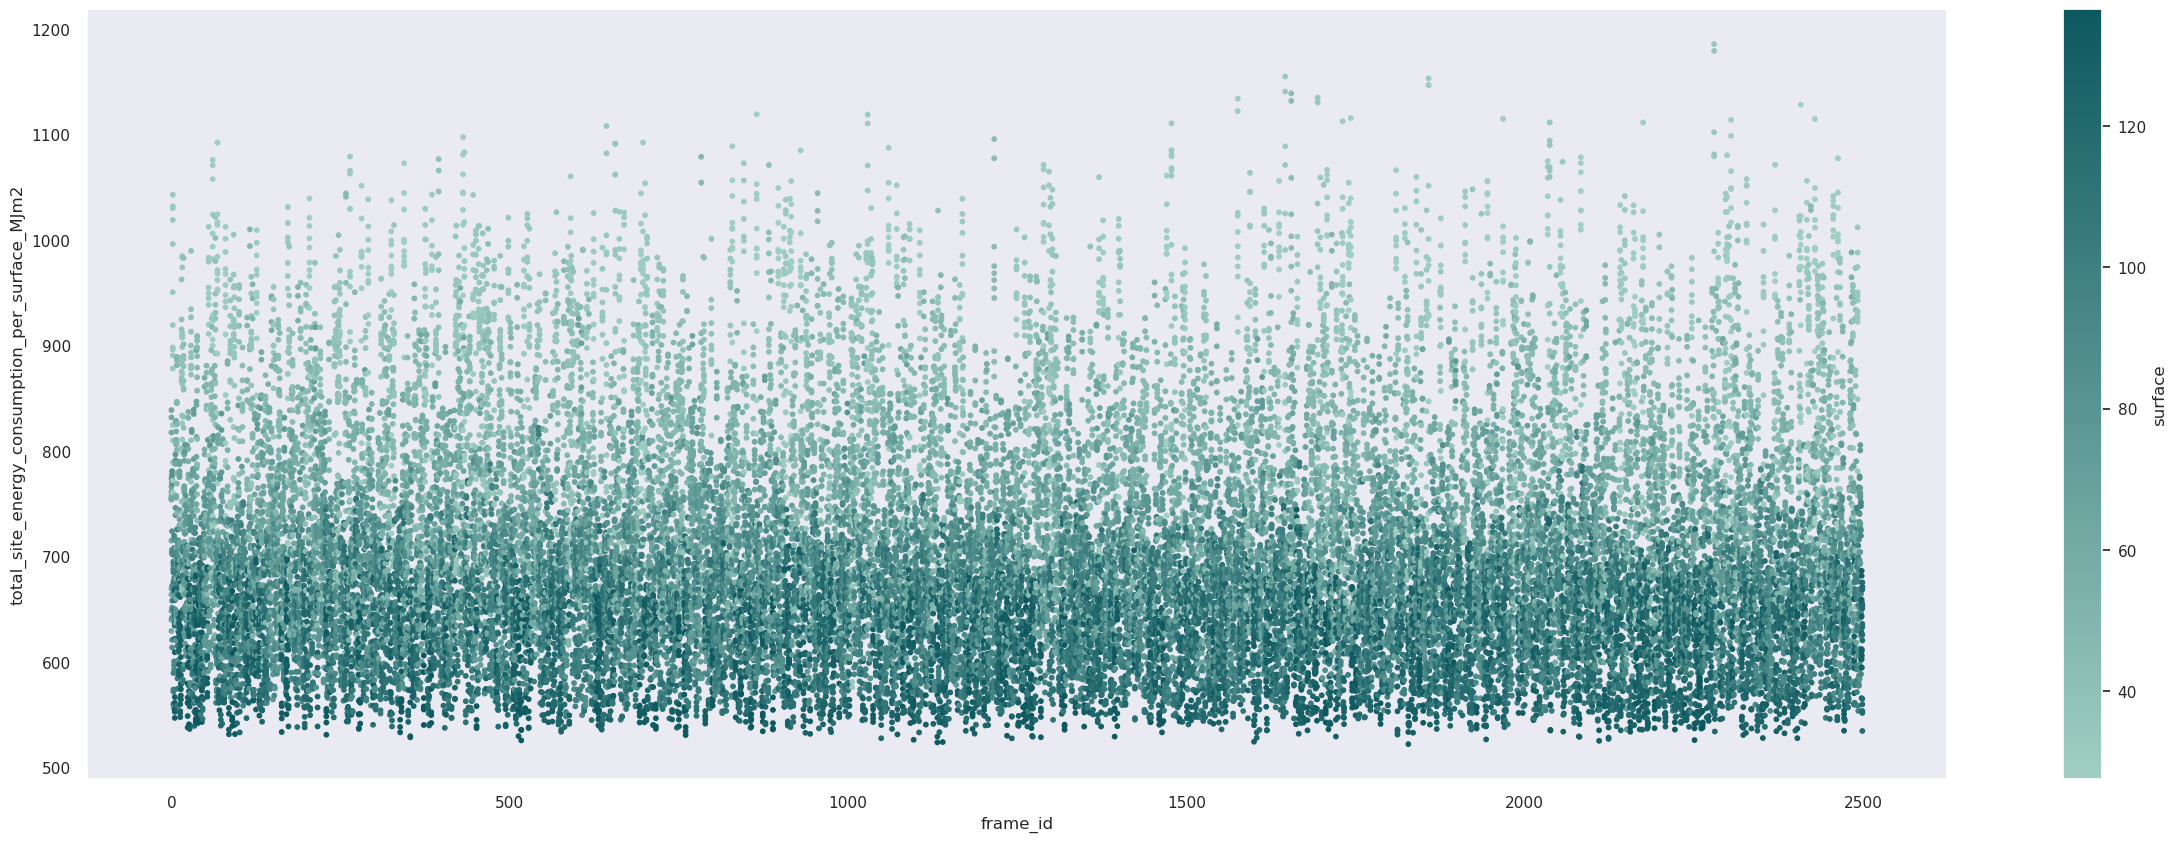

In [117]:
plot3 = data_summary.plot.scatter(
    x='frame_id',
    y='total_site_energy_consumption_per_surface_MJm2',
    c='surface',
    s=10,
    colormap='my_cmap1',
    marker='o',
    figsize=(30, 10),
    grid=False,
    rasterized=True
)
plt.savefig('./plot1.svg', format='svg', dpi=100)